# Import libraries

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error
import warnings

# Kaggle Setup

In [2]:
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/home-data-for-ml-course/sample_submission.csv
/kaggle/input/home-data-for-ml-course/sample_submission.csv.gz
/kaggle/input/home-data-for-ml-course/train.csv.gz
/kaggle/input/home-data-for-ml-course/data_description.txt
/kaggle/input/home-data-for-ml-course/test.csv.gz
/kaggle/input/home-data-for-ml-course/train.csv
/kaggle/input/home-data-for-ml-course/test.csv


# Load and Know Your Data

In [3]:
path_train= "/kaggle/input/home-data-for-ml-course/train.csv"
path_test= "/kaggle/input/home-data-for-ml-course/test.csv"
# path_train= "dataset/train.csv"
# path_test= "dataset/test.csv"
test= pd.read_csv(path_test)
df= pd.read_csv(path_train)
print("shape test: ",test.shape)
print("shape train:", df.shape)

shape test:  (1459, 80)
shape train: (1460, 81)


In [4]:
print("----------  TEST ----------")
print(test.head(2))

----------  TEST ----------
     Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl        NAmes      Feedr   
1         Lvl    AllPub    Corner       Gtl        NAmes       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     1Story            5            6       1961   
1       Norm     1Fam     1Story            6            6       1958   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          1961     Gable  CompShg     VinylSd     VinylSd        NaN   
1          1958       Hip  CompShg     Wd Sdng     Wd Sdng    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0         

In [5]:
print("----------  TRAIN ----------")
print(df.head(2))

----------  TRAIN ----------
   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd        NaN   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0  

In [6]:
print("Test columns:\n", list(test.columns))

Test columns:
 ['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'Pool

In [7]:
print("Train columns:\n", list(df.columns))

Train columns:
 ['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'Poo

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [9]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


# Exploratory Data Analysis

## Eda Class

In [10]:
class Eda:
    def __init__(self):
        pass

    def get_specific_df(self, df:pd.DataFrame, _type:str="numerical"):
        try:
            numerical= df.describe(include="number").columns
        except ValueError:
            print("error in numerical")
            numerical= []
        try:
            categorical= df.describe(exclude="number").columns
        except ValueError:
            print("error in categorical")
            categorical= []
        continous= [col for col in numerical if df[col].nunique()>20]
        descrete= [col for col in numerical if df[col].nunique()<=20]
        temporal = [col for col in numerical if 'Year' in col or 'Yr' in col] # Time, date, year, duration
        binary = [col for col in categorical if df[col].nunique() == 2]
        ordinal = [col for col in categorical if 'Qual' in col or 'Cond' in col]
        nominal = [col for col in categorical if col not in binary + ordinal] # Name, gender, city, state etc
        if _type == "numerical":
            return df[numerical]
        elif _type== "continous":
            df = df[continous]
            for col in temporal:
                if col in df.columns:
                    df.drop(col, axis=1, inplace=True)
            if df.empty:
                print("Empty dataframe")
                return pd.DataFrame(columns=continous)
            return df
            
        elif _type== "descrete":
            df= df[descrete]
            for col in temporal:
                if col not in df.columns:
                    df.drop(col, axis=1, inplace=True)
            return df
            
        elif _type== "temporal":
            # Temporal features are any columns in your dataset that represent time — either directly or indirectly.
            return df[temporal]
        elif _type== "categorical":
            return df[categorical]
        elif _type == "binary":
            return df[binary]
        elif _type == "ordinal":
            return df[ordinal]
        elif _type == "nominal":
            return df[nominal]

    def _handle_null(
        self,
        df: pd.DataFrame
        ):
        if not df.empty:
            cols_to_keep= [col for col in df.columns if "unnamed" not in col.lower()]
            df= df[cols_to_keep]
            # Drop columns with higher nulls
            threshold= 0.29
            null_ratio= df.isna().mean() # Calculate null fraction per column
            col_to_drop= list(null_ratio[null_ratio>threshold].index)
            if col_to_drop:
                df.drop(col_to_drop, axis=1, inplace=True)
                print(f"Dropped columns: {list(col_to_drop)}")
            else:
                print("No columns found to be dropped")
            numerical_cols= df.select_dtypes(include="number").columns
            # Null handling in numerical cols
            for col in numerical_cols:
                df[col]= df[col].fillna(df[col].median())
            
            categoric_cols= df.select_dtypes(exclude="number").columns
            # Null handling in categorical cols
            for col in categoric_cols:
                top= df[col].describe().top
                df[col]= df[col].fillna(top)
        else:
            print("Got an empty dataframe!")
        return df

## Null counts

In [11]:
print("Average null values in each column:")
print(df.isna().mean()*100)

Average null values in each column:
Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
Street            0.000000
Alley            93.767123
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType       59.726027
MasVnrArea        0.547945
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.534247
BsmtCond          2.534247
BsmtExposure      2.602740
BsmtFinType1      2.534247
BsmtFinSF1        0.000000
BsmtFinType2      2

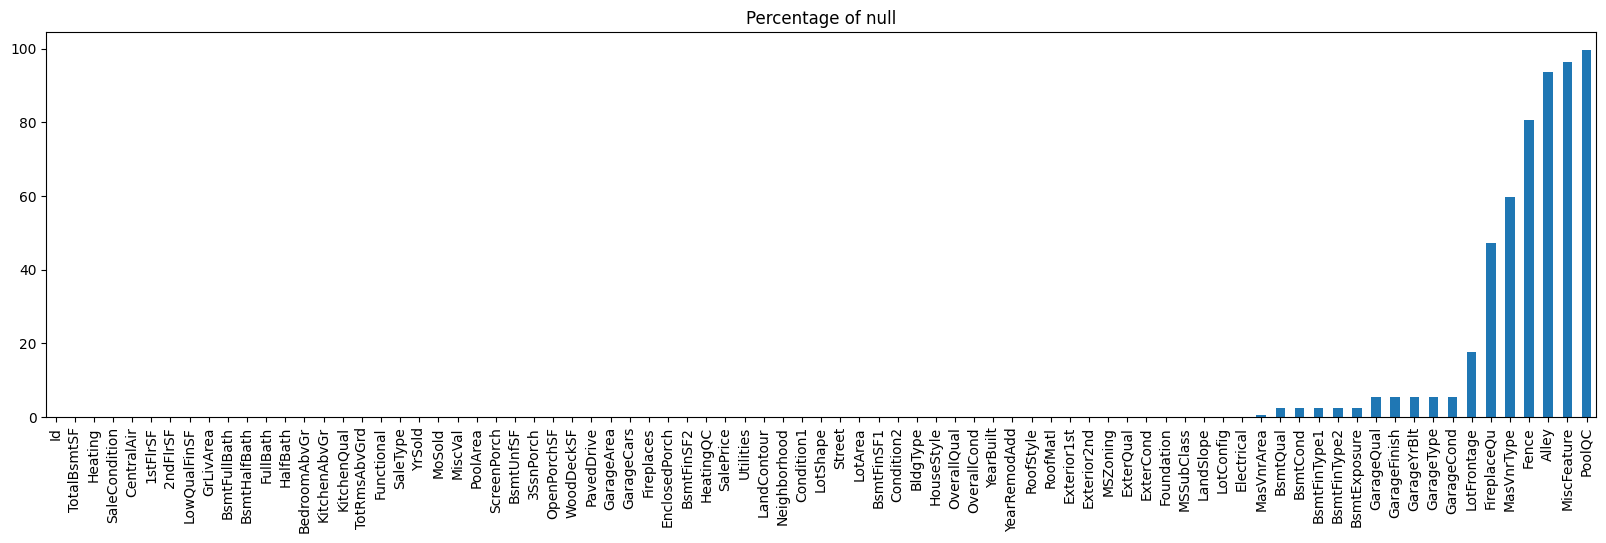

In [12]:
plt.rcParams["figure.figsize"]= (20,5)
plt.title("Percentage of null")
(df.isna().mean()*100).sort_values().plot.bar()
plt.show()

## Visualization

In [13]:
eda= Eda()
df_without_null= eda._handle_null(df.copy())
df_continous= eda.get_specific_df(df_without_null.copy(), _type="continous")
df_continous.head(2)

Dropped columns: ['Alley', 'MasVnrType', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']


,Id,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MiscVal,SalePrice
0,1,65.0,8450,196.0,706,0,150,856,856,854,0,1710,548,0,61,0,0,0,208500
1,2,80.0,9600,0.0,978,0,284,1262,1262,0,0,1262,460,298,0,0,0,0,181500


### Target : SalePrice

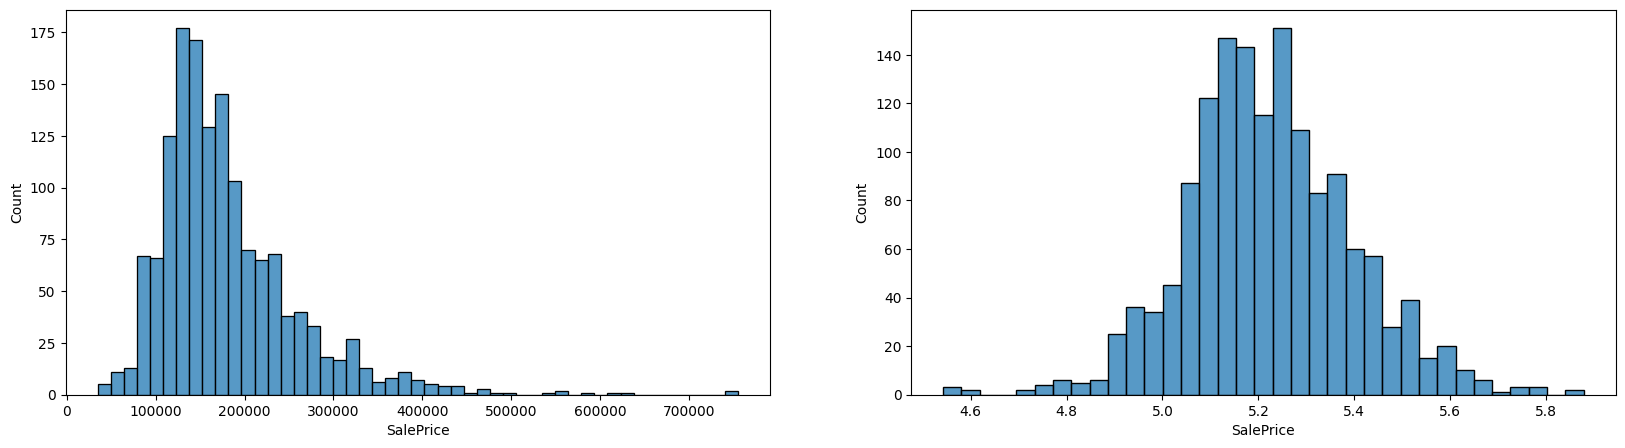

In [14]:
plt.rcParams["figure.figsize"] = (20, 5)
fix, ax= plt.subplots(nrows=1, ncols=2)
col= "SalePrice"
sns.histplot(df_continous[col].fillna(df_continous[col].median()), ax=ax[0])
sns.histplot(np.log10(df_continous[col].fillna(df_continous[col].median())), ax= ax[1])
plt.show()

### Lot

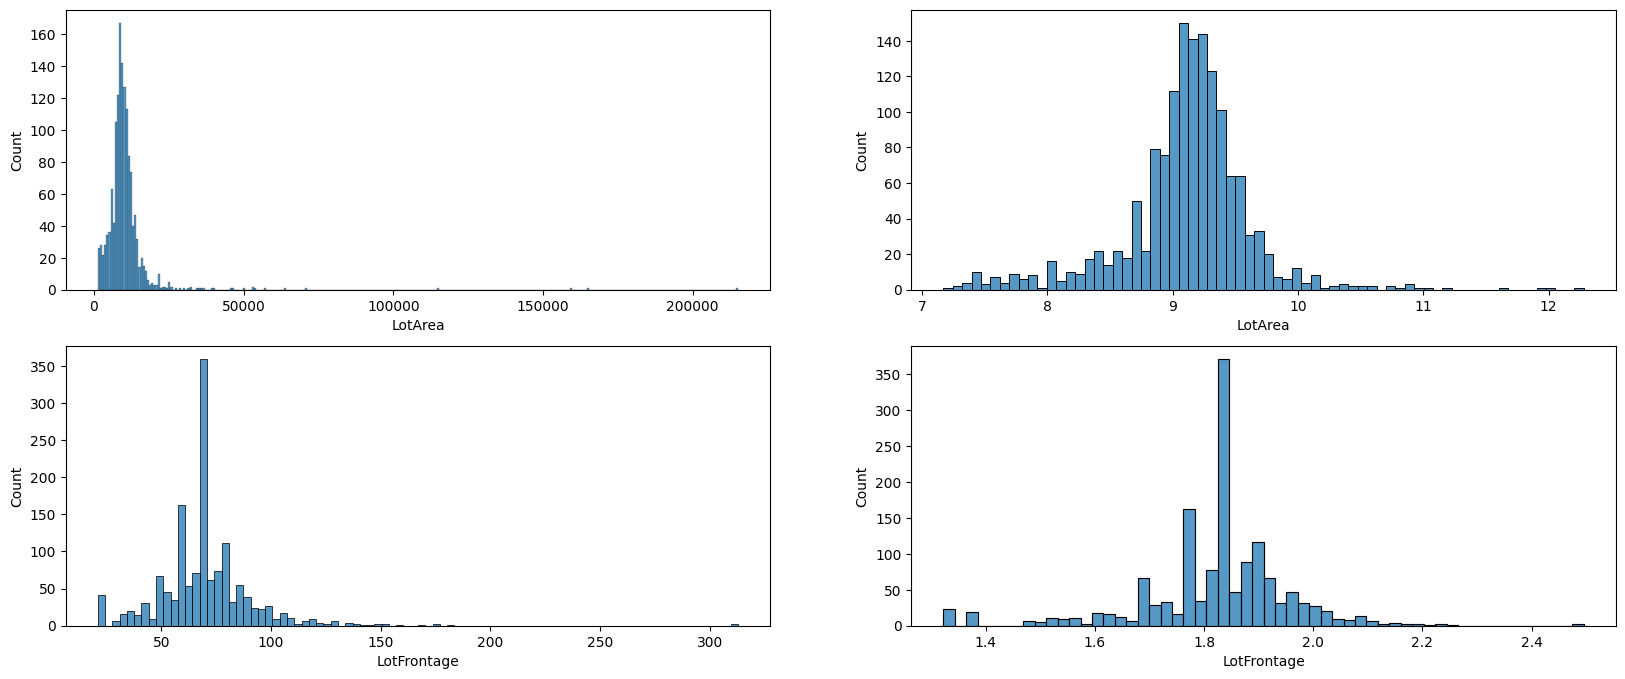

In [15]:
plt.rcParams["figure.figsize"] = (20, 8)
fix, ax= plt.subplots(nrows=2, ncols=2)
lot= "LotArea"
sns.histplot(df_continous[lot].fillna(df_continous[lot].median()), ax=ax[0][0])
sns.histplot(np.log1p(df_continous[lot].fillna(df_continous[lot].median())), ax= ax[0][1])

lot= "LotFrontage"
sns.histplot(df_continous[lot].fillna(df_continous[lot].median()), ax=ax[1][0])
sns.histplot(np.log10(df_continous[lot].fillna(df_continous[lot].median())), ax= ax[1][1])
plt.show()

### MasVnrArea

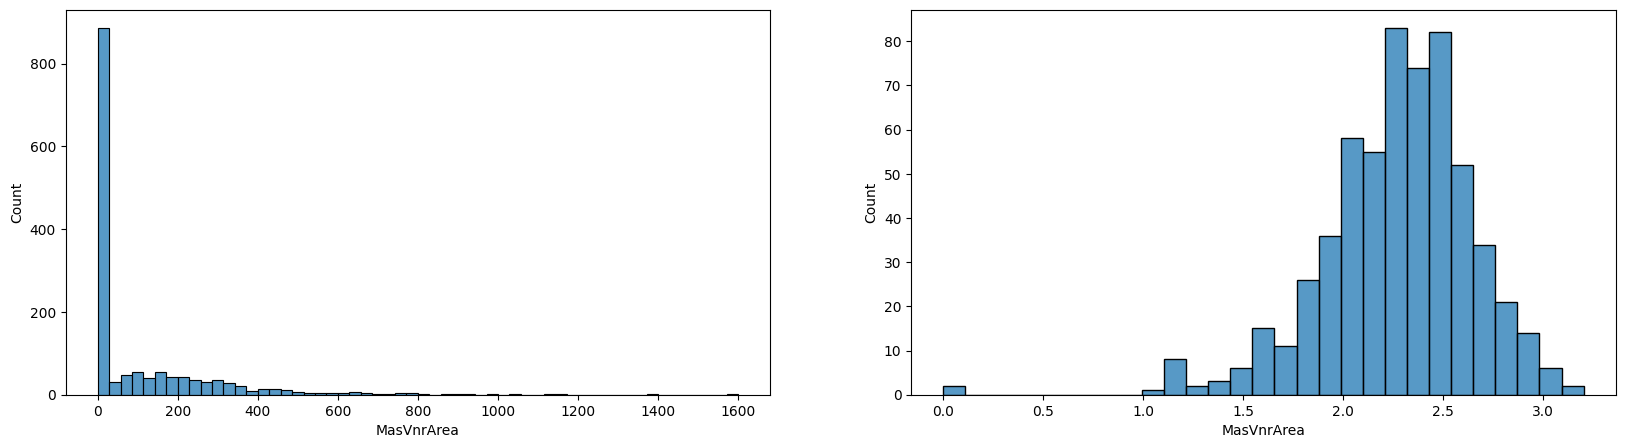

In [16]:
plt.rcParams["figure.figsize"] = (20, 5)
fix, ax= plt.subplots(nrows=1, ncols=2)
col= "MasVnrArea"
sns.histplot(df_continous[col].fillna(df_continous[col].median()), ax=ax[0])
sns.histplot(np.log10(df_continous[col].fillna(df_continous[col].median())), ax= ax[1])
plt.show()

### bsmt

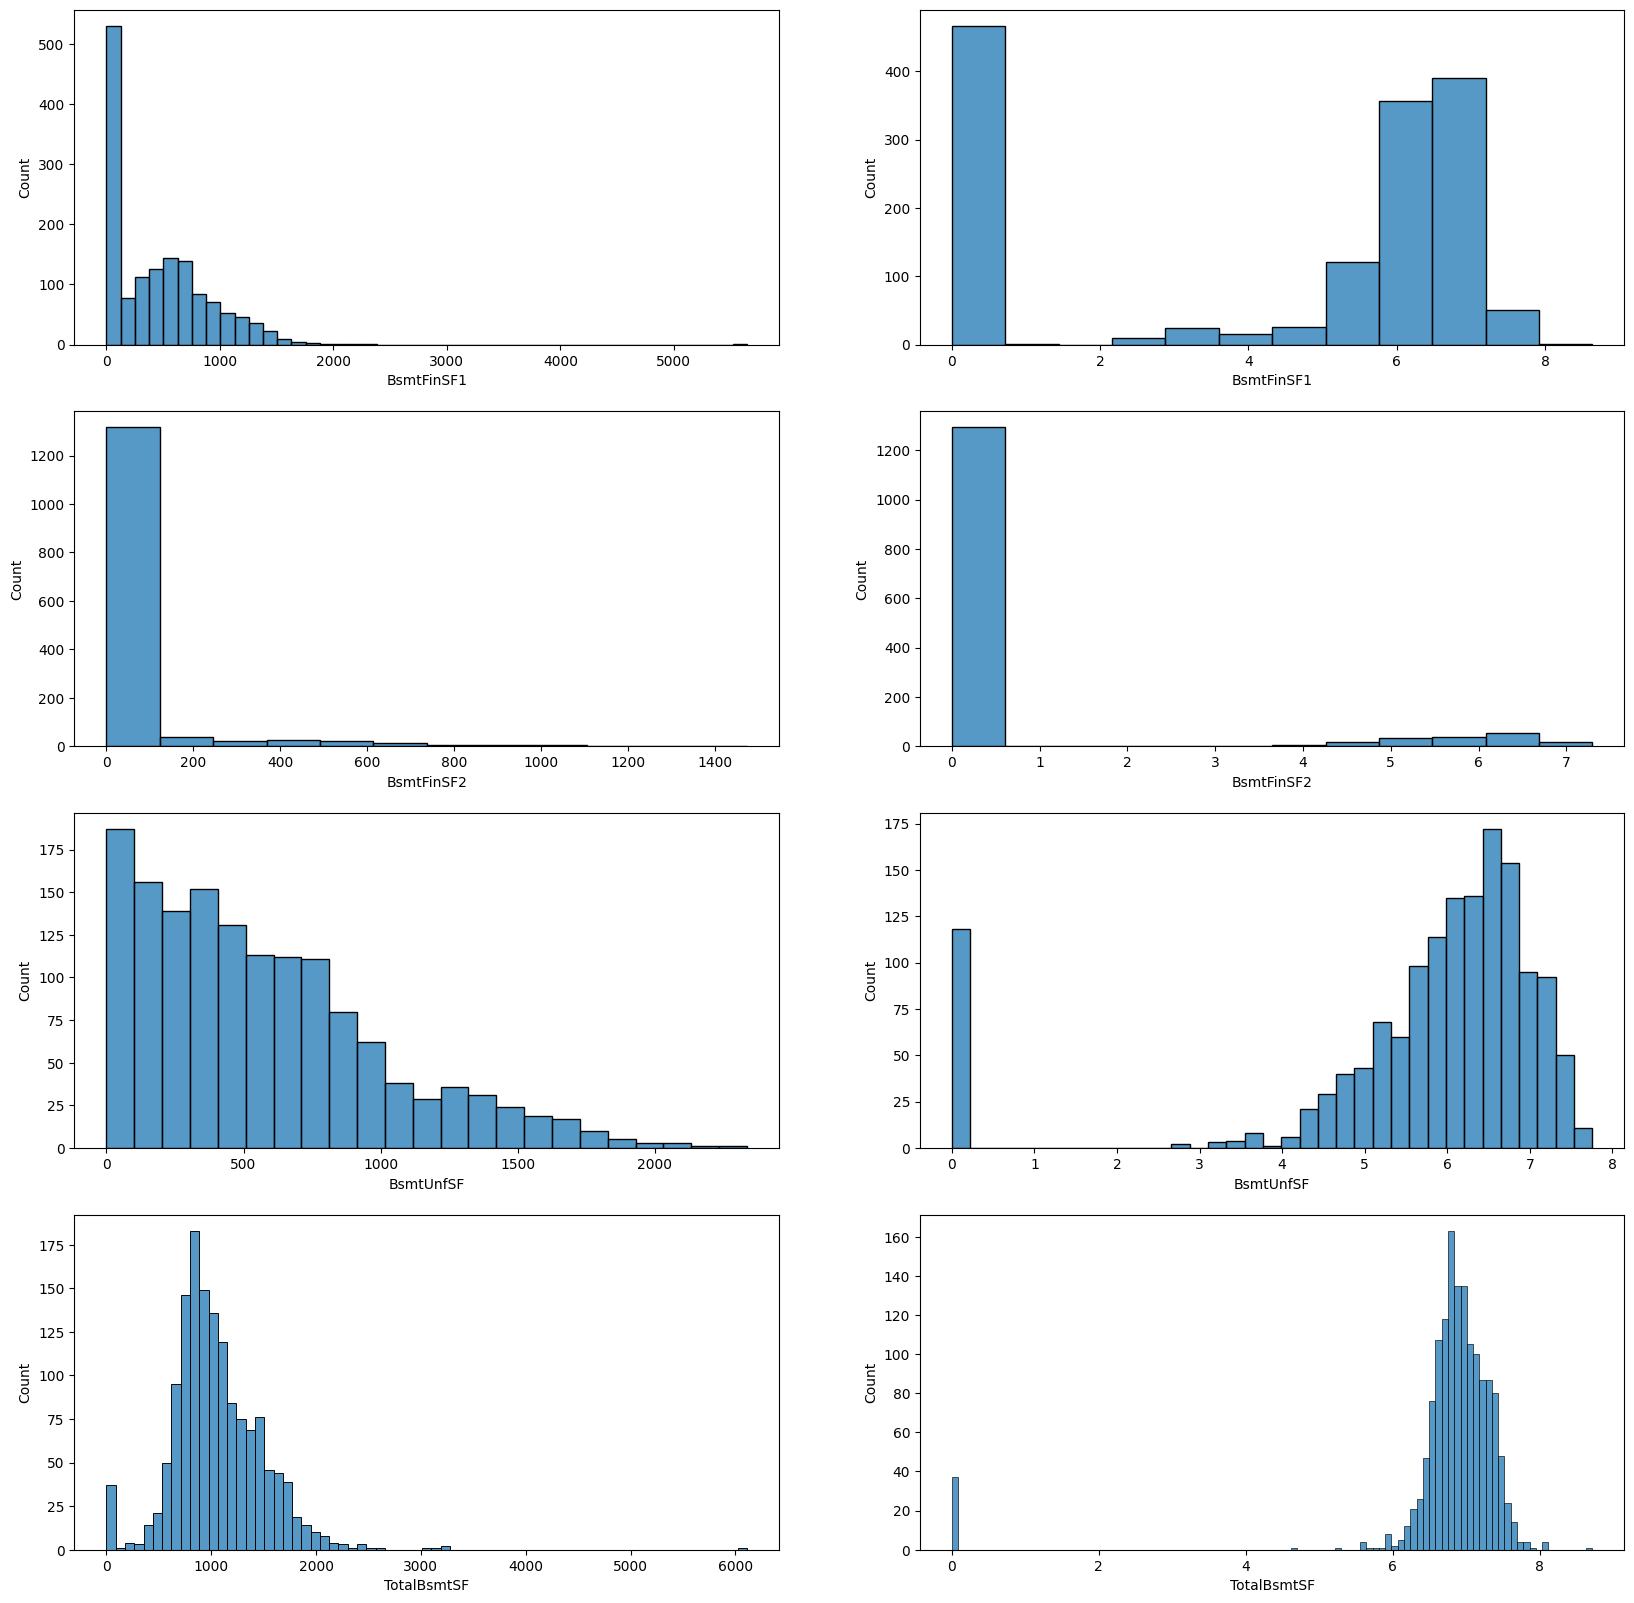

In [17]:
plt.rcParams["figure.figsize"] = (20, 20)
fix, ax= plt.subplots(nrows=4, ncols=2)
col= "BsmtFinSF1"
sns.histplot(df_continous[col].fillna(df_continous[col].median()), ax=ax[0][0])
sns.histplot(np.log1p(df_continous[col].fillna(df_continous[col].median())), ax= ax[0][1])

col= "BsmtFinSF2"
sns.histplot(df_continous[col].fillna(df_continous[col].median()), ax=ax[1][0])
sns.histplot(np.log1p(df_continous[col].fillna(df_continous[col].median())), ax= ax[1][1])

col= "BsmtUnfSF"
sns.histplot(df_continous[col].fillna(df_continous[col].median()), ax=ax[2][0])
sns.histplot(np.log1p(df_continous[col].fillna(df_continous[col].median())), ax= ax[2][1])

col= "TotalBsmtSF"
sns.histplot(df_continous[col].fillna(df_continous[col].median()), ax=ax[3][0])
sns.histplot(np.log1p(df_continous[col].fillna(df_continous[col].median())), ax= ax[3][1])
plt.show()

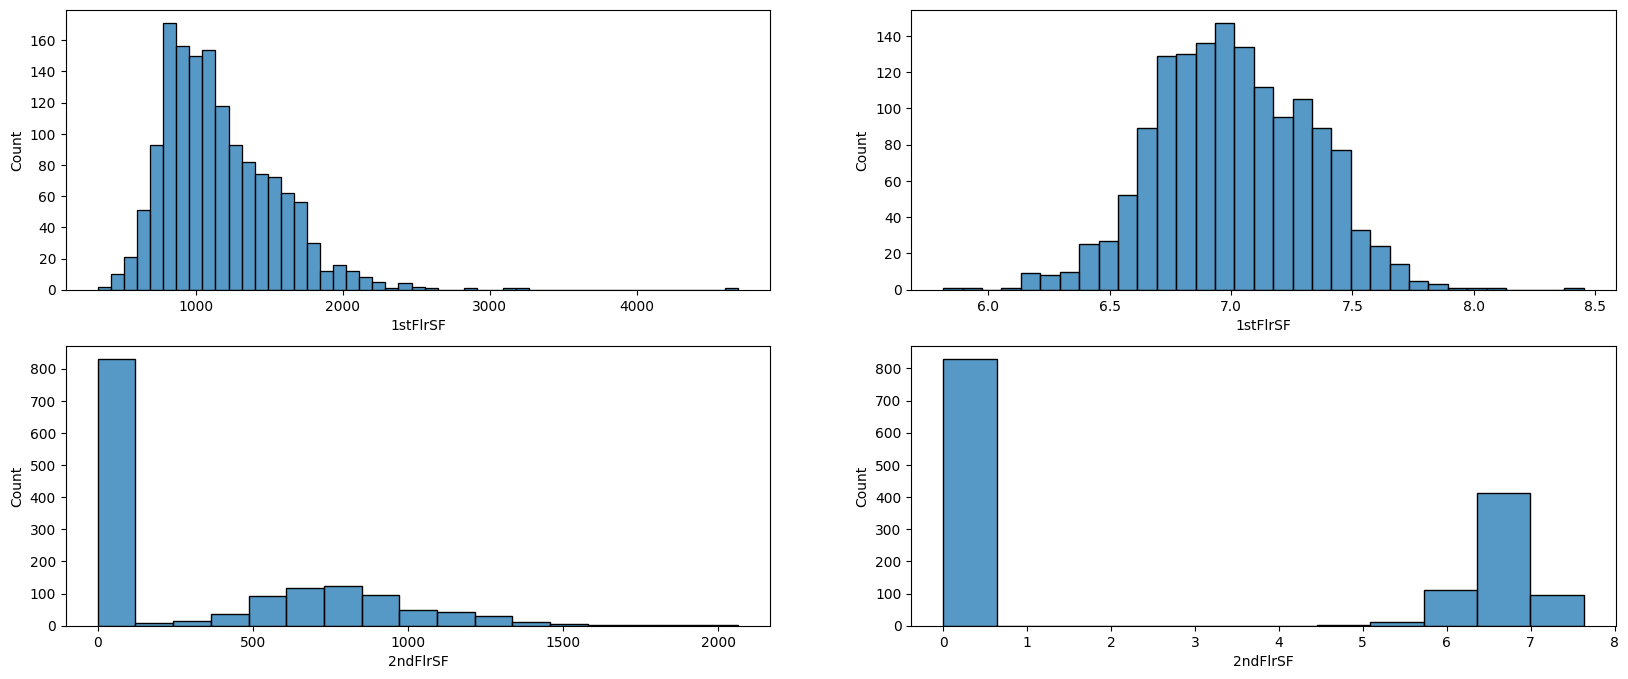

In [18]:
plt.rcParams["figure.figsize"] = (20, 8)
fix, ax= plt.subplots(nrows=2, ncols=2)
col= "1stFlrSF"
sns.histplot(df_continous[col].fillna(df_continous[col].median()), ax=ax[0][0])
sns.histplot(np.log1p(df_continous[col].fillna(df_continous[col].median())), ax= ax[0][1])

col= "2ndFlrSF"
sns.histplot(df_continous[col].fillna(df_continous[col].median()), ax=ax[1][0])
sns.histplot(np.log1p(df_continous[col].fillna(df_continous[col].median())), ax= ax[1][1])
plt.show()

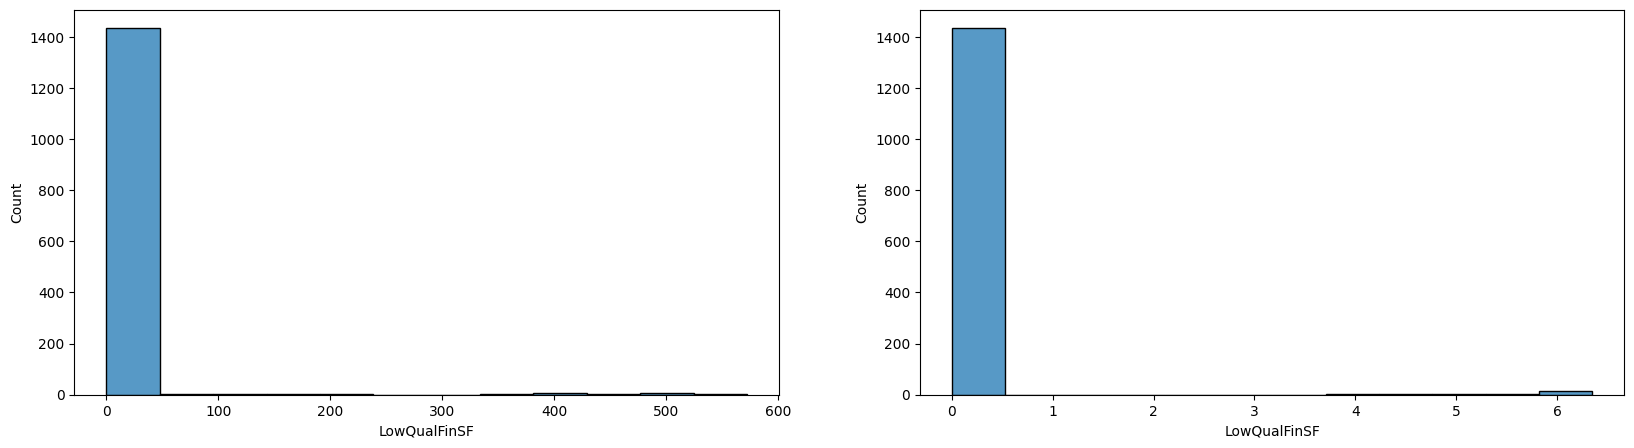

In [19]:
plt.rcParams["figure.figsize"] = (20, 5)
fix, ax= plt.subplots(nrows=1, ncols=2)
col= "LowQualFinSF"
sns.histplot(df_continous[col].fillna(df_continous[col].median()), ax=ax[0])
sns.histplot(np.log1p(df_continous[col].fillna(df_continous[col].median())), ax= ax[1])
plt.show()

### Garage

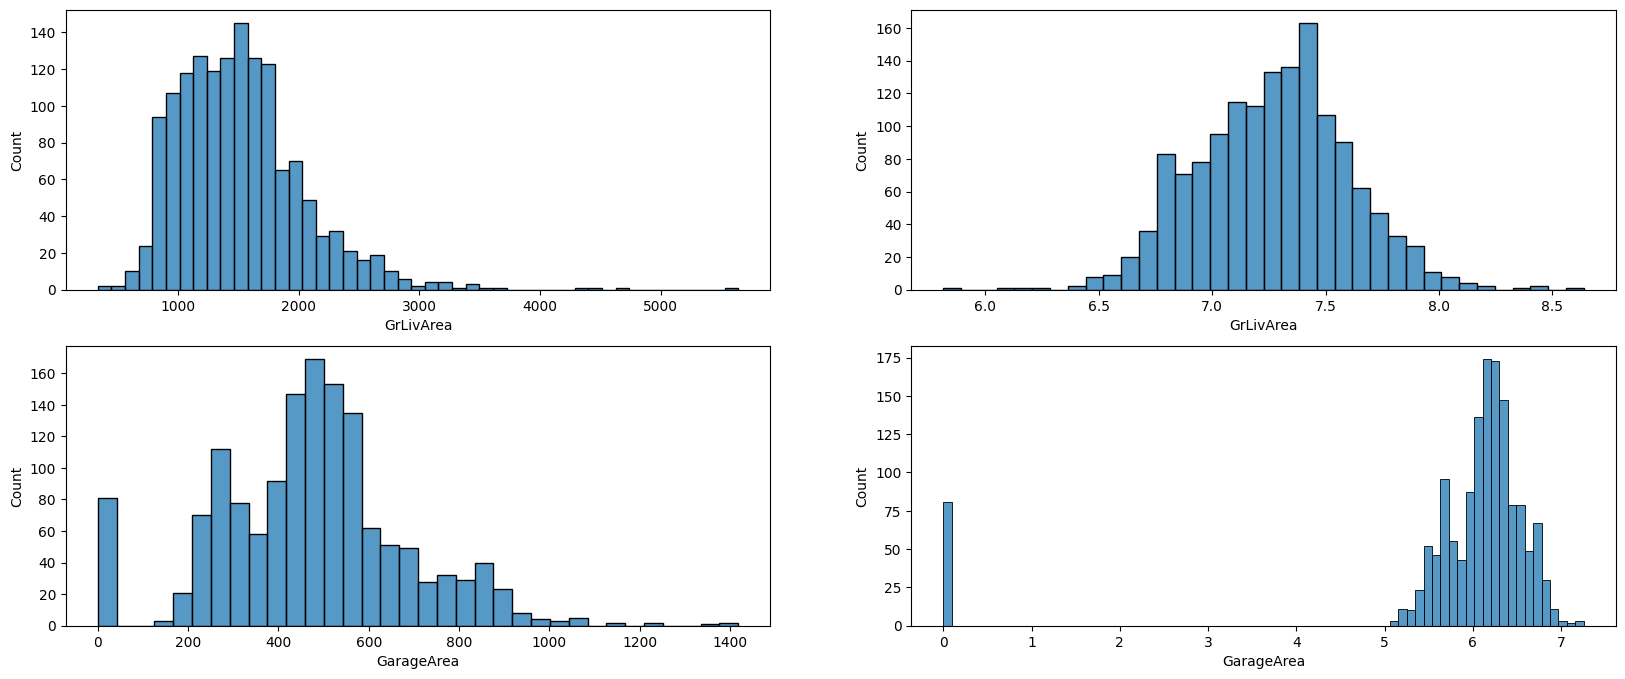

In [20]:
plt.rcParams["figure.figsize"] = (20, 8)
fix, ax= plt.subplots(nrows=2, ncols=2)
lot= "GrLivArea"
sns.histplot(df_continous[lot].fillna(df_continous[lot].median()), ax=ax[0][0])
sns.histplot(np.log1p(df_continous[lot].fillna(df_continous[lot].median())), ax= ax[0][1])

lot= "GarageArea"
sns.histplot(df_continous[lot].fillna(df_continous[lot].median()), ax=ax[1][0])
sns.histplot(np.log1p(df_continous[lot].fillna(df_continous[lot].median())), ax= ax[1][1])
plt.show()

### WoodDeckSF

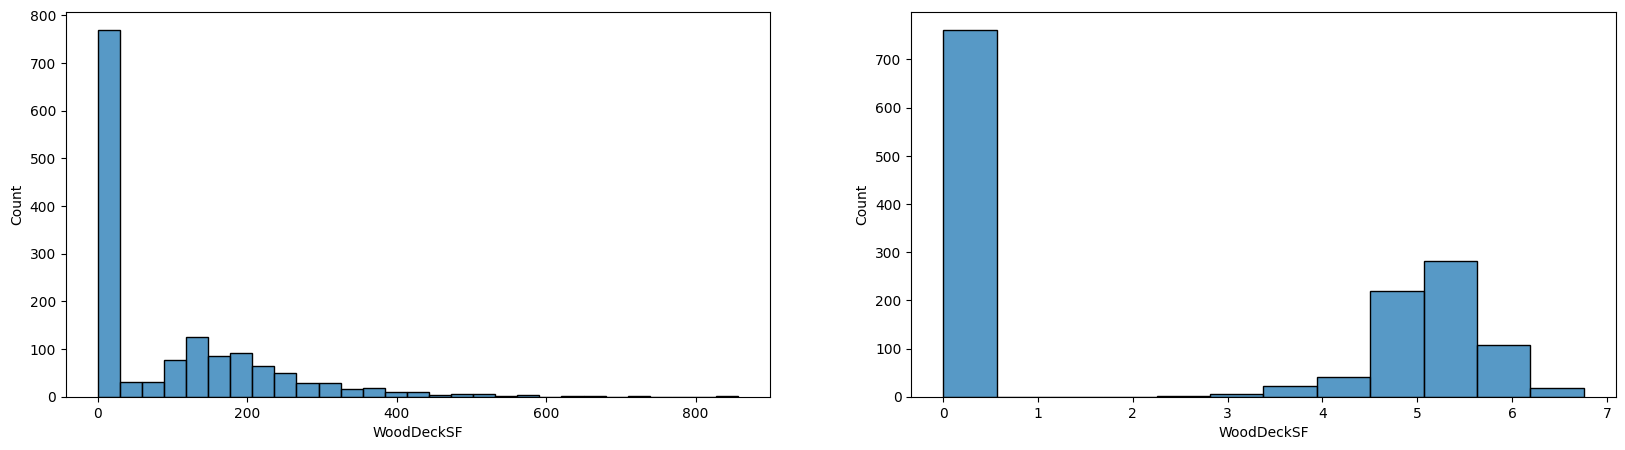

In [21]:
plt.rcParams["figure.figsize"] = (20, 5)
fix, ax= plt.subplots(nrows=1, ncols=2)
col= "WoodDeckSF"
sns.histplot(df_continous[col].fillna(df_continous[col].median()), ax=ax[0])
sns.histplot(np.log1p(df_continous[col].fillna(df_continous[col].median())), ax= ax[1])
plt.show()

### Porch

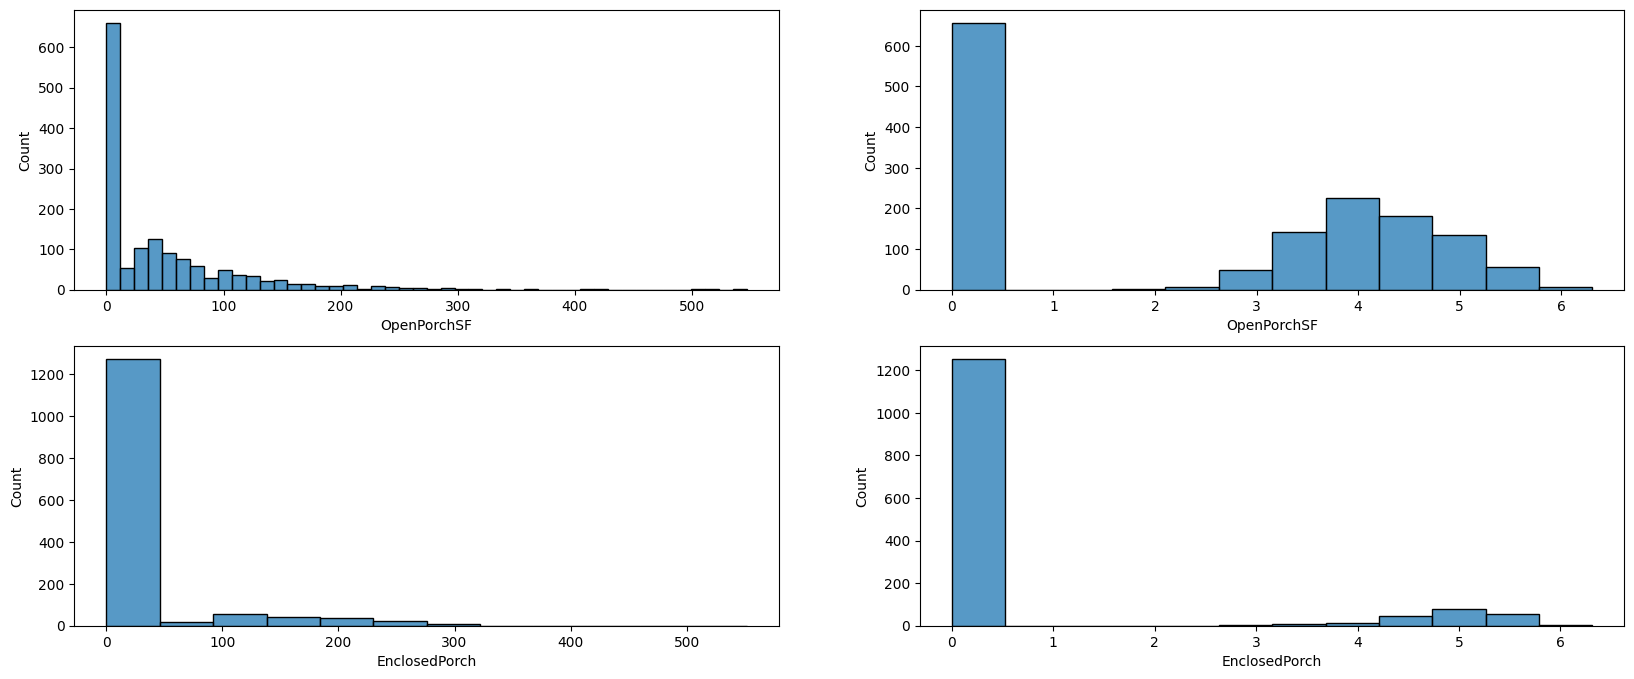

In [22]:
plt.rcParams["figure.figsize"] = (20, 8)
fix, ax= plt.subplots(nrows=2, ncols=2)
lot= "OpenPorchSF"
sns.histplot(df_continous[lot].fillna(df_continous[lot].median()), ax=ax[0][0])
sns.histplot(np.log1p(df_continous[lot].fillna(df_continous[lot].median())), ax= ax[0][1])

lot= "EnclosedPorch"
sns.histplot(df_continous[lot].fillna(df_continous[lot].median()), ax=ax[1][0])
sns.histplot(np.log1p(df_continous[lot].fillna(df_continous[lot].median())), ax= ax[1][1])
plt.show()

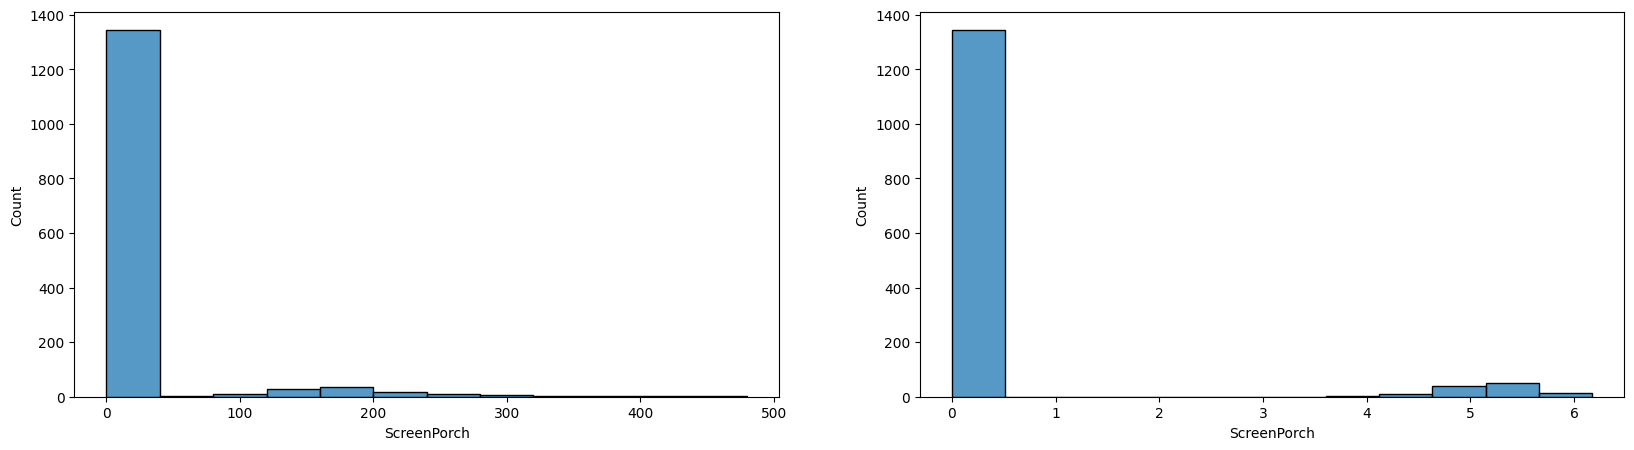

In [23]:
plt.rcParams["figure.figsize"] = (20, 5)
fix, ax= plt.subplots(nrows=1, ncols=2)
col= "ScreenPorch"
sns.histplot(df_continous[col].fillna(df_continous[col].median()), ax=ax[0])
sns.histplot(np.log1p(df_continous[col].fillna(df_continous[col].median())), ax= ax[1])
plt.show()

### MiscVal

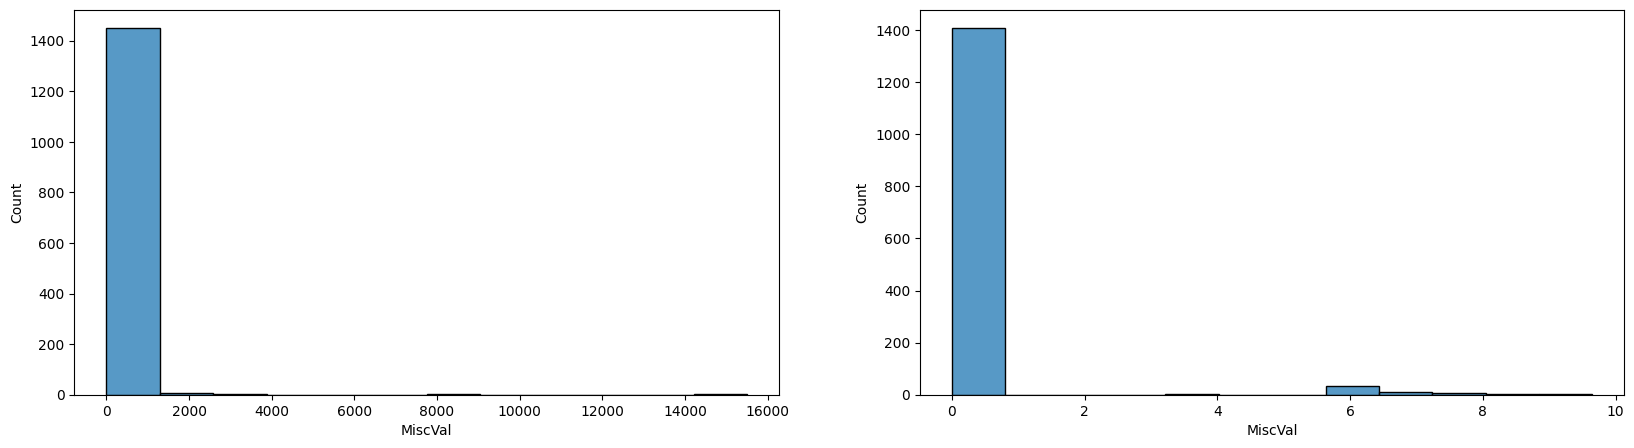

In [24]:
plt.rcParams["figure.figsize"] = (20, 5)
fix, ax= plt.subplots(nrows=1, ncols=2)
col= "MiscVal"
sns.histplot(df_continous[col].fillna(df_continous[col].median()), ax=ax[0])
sns.histplot(np.log1p(df_continous[col].fillna(df_continous[col].median())), ax= ax[1])
plt.show()

### Heatmap

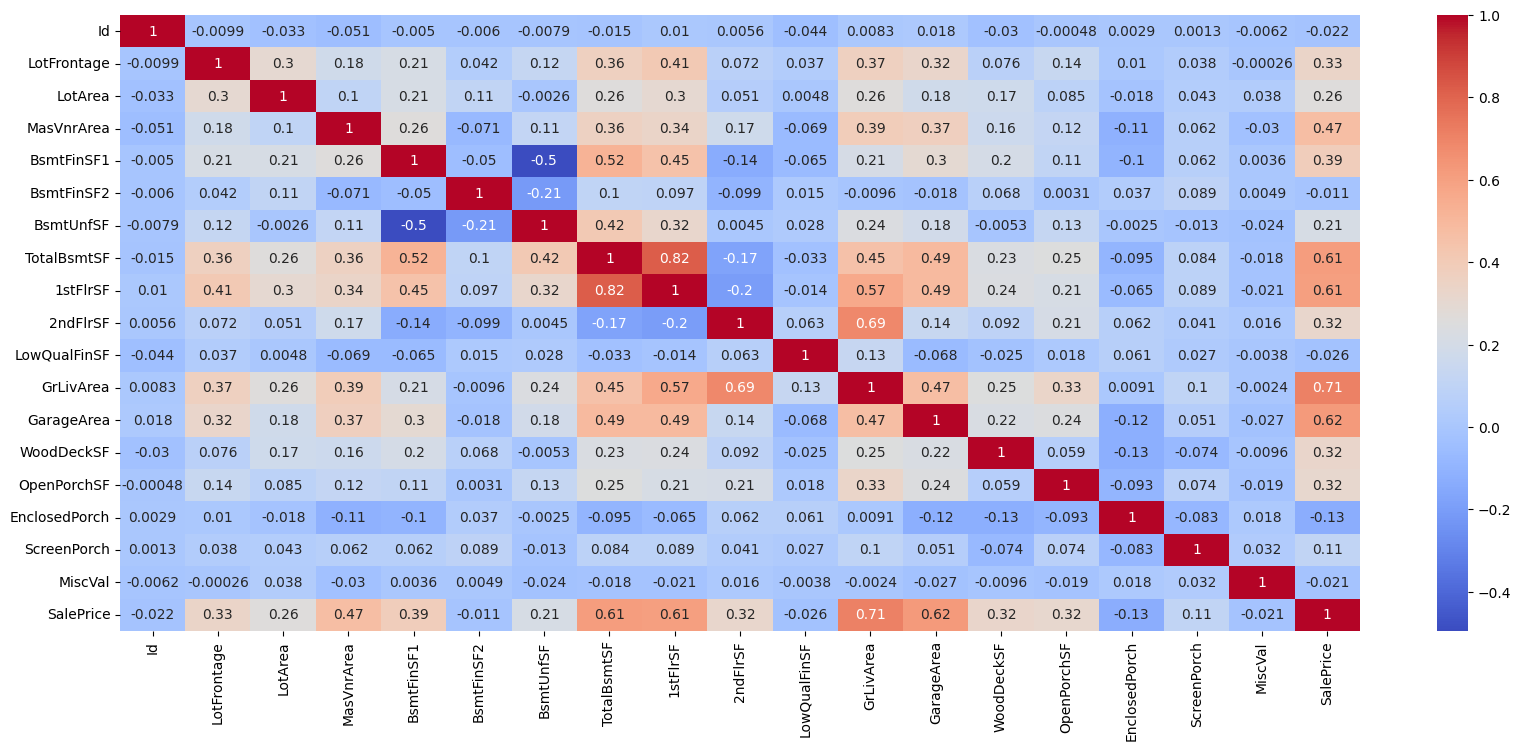

In [25]:
# cols= ["BsmtFinSF1", "BsmtFinSF2", "1stFlrSF", "2ndFlrSF"]
cols= []
plt.rcParams["figure.figsize"]= (20, 8)
corr= df_continous.drop(cols, axis=1).corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.show()

# FeatureEngineering

In [26]:
# from statsmodels.stats.outliers_influence import variance_inflation_factor
# y.drop(["Id", "GrLivArea", "SalePrice", "total_flr_sf", "TotalBsmtSF"], axis=1, inplace=True)
# vif_data = pd.DataFrame()
# vif_data["Feature"] = y.columns
# vif_data["VIF"] = [variance_inflation_factor(y.values, i)
#                    for i in range(y.shape[1])]

In [27]:
class HousePriceFeatureEngineering(Eda):
    def __init__(self):
        pass

    def __handle_peak_at_zero(self, df):
        cols_to_drop= ["1stFlrSF", "2ndFlrSF", "BsmtFinSF1", "BsmtFinSF2",
                       "OpenPorchSF", "EnclosedPorch", "ScreenPorch",
                       "MiscVal", "LowQualFinSF", "BsmtUnfSF", "Id", "GrLivArea",
                       "total_flr_sf", "TotalBsmtSF"]
        # df["has_mas_vnr_area"]= (df["MasVnrArea"]>0).astype(int)
        # df["has_bsmt"]= (df["TotalBsmtDF"]>0).astype(int)
        df["has_2nd_flr"]= (df["2ndFlrSF"]>0).astype(int)
        df["has_miscval"]= (df["MiscVal"]>0).astype(int) # drop miscval
        df["has_low_qual_fin"]= (df["LowQualFinSF"]>0).astype(int)
        # df["has_garage_area"]= (df["GarageArea"]>0).astype(int)
        df["has_screen_porch"]= (df["ScreenPorch"]>0).astype(int)
        df["total_porch_sf"]= df["OpenPorchSF"] + df["EnclosedPorch"] + df["ScreenPorch"] # drop open, enclosed and screen
        # df["has_porch"]= (df["total_porch_sf"]>0).astype(int)
        df["total_flr_sf"]= df["1stFlrSF"] + df["2ndFlrSF"] # drop 1st and 2nd
        df["flr_ratio"]= df["2ndFlrSF"]/(df["1stFlrSF"]+1)
        df["finish_bsmt_ratio"]= (df["BsmtFinSF1"] + df["BsmtFinSF2"])/df["TotalBsmtSF"].replace(0, np.nan) # drop sf1 and sf2
        # df["unfinish_bsmt_ratio"]= df["BsmtUnfSF"]/df["TotalBsmtSF"].replace(0, np.nan) # drop unf not including because correlation with finish
        
        df["finish_bsmt_ratio"].fillna(0, inplace=True)
        # df["unfinish_bsmt_ratio"].fillna(0, inplace=True)
        df.drop(cols_to_drop, axis=1, inplace=True)
        less_vif_col= ['LotFrontage', 'LotArea', 'MasVnrArea', 'GarageArea', 'WoodDeckSF',
       'total_porch_sf', 'flr_ratio', 'finish_bsmt_ratio']
        return df

    def __handle_outlier(self, df):
        q1= df["SalePrice"].quantile(.25)
        q3= df["SalePrice"].quantile(.75)
        iqr= q3-q1
        lower= q1- (1.5*iqr)
        upper= q3 + (1.5*iqr)
        print("q1:", q1)
        print("q3:", q3)
        print("iqr:", iqr)
        print("lower:", lower)
        print("upper:", upper)
        def cap(sp):
            if sp< lower:
                return lower
            elif sp > upper:
                return upper
            else:
                return sp
        df["SalePrice"]= df["SalePrice"].apply(cap)
        return df

    def __data_transformation(self, df:pd.DataFrame):
        # if "SalePrice" in df.columns:
        #     features= ["LotFrontage", "LotArea", "MasVnrArea", "GarageArea", "WoodDeckSF", "total_porch_sf"]
        # else:
        features= ["LotFrontage", "LotArea", "MasVnrArea", "GarageArea", "WoodDeckSF", "total_porch_sf"]
        df[features]= np.log10(df[features]+1)
        return df

    def __encode_categorical_features(self, df: pd.DataFrame, encoder=None, fit= True):
        if not df.empty:
            features= list(df.describe(include="object").columns)
            additional_features= ["MSSubClass"]
            features.extend(additional_features)
            if fit:
                print("fit encoder is true!")
                encoder= OneHotEncoder(handle_unknown="ignore", sparse_output=False)
                encoder.fit(df[features])
            else:
                print("fit encoder is false")
            if encoder:
                print("transforming...")
                encoded_array= encoder.transform(df[features])
                print("data transformed")
                df= pd.concat([
                    df.drop(features, axis=1),
                    pd.DataFrame(data=encoded_array, columns= encoder.get_feature_names_out(features), index= df.index)
                ], axis=1)
                print("Data successfully encoded!")
            else:
                print("encoder not found")
        else:
            print("dataframe is empty")
        return df, encoder

    def __scaling(self, df:pd.DataFrame, scaler_x=None, scaler_y=None, fit=True):
        feature_to_scale=[]
        if not df.empty:
            col_exclude= ["Id", "YearBuilt", "YearRemodAdd", "GarageYrBlt", "YrSold", "SalePrice", "MSSubClass",
                         "OverallQual", "OverallCond", "LowQualFinSF", "BsmtFullBath", "BsmtHalfBath", "FullBath", "HalfBath",
                          "BedroomAbvGr", "KitchenAbvGr", "KitchenAbvGr", "TotRmsAbvGrd", "FirePlaces", "GarageCars",
                          "3SsnPorch", "PoolArea", "MiscVal", "MoSold"]
            # numeric_cols= df.describe(include="number")
            # features= [col for col in numeric_cols if col not in col_exclude]
            features= ["LotFrontage", "LotArea", "MasVnrArea", "GarageArea", "WoodDeckSF", "total_porch_sf"]
            if fit:
                print("fit scaler is true!")
                scaler_x= StandardScaler()
                scaler_y= StandardScaler()
                scaler_x.fit(df[features])
                scaler_y.fit(df[["SalePrice"]])
                df["SalePrice"]= scaler_y.transform(df[["SalePrice"]])
            else:
                print("fit scaler is false!")

            df[features]= scaler_x.transform(df[features])
            print("Data successfully scaled!")
        else:
            print("The dataframe is empty")
        return df, scaler_x, scaler_y

    def data_preprocessing(self, df:pd.DataFrame, encoder=None, scaler_x=None, scaler_y=None, fit=True):
        df= self._handle_null(df)
        df= self.__handle_peak_at_zero(df)
        # if fit:
        #     df= self.__handle_outlier(df)
        df= self.__data_transformation(df)
        df, encoder= self.__encode_categorical_features(df=df, encoder=encoder, fit=fit)
        df, scaler_x, scaler_y= self.__scaling(df=df, scaler_x=scaler_x, scaler_y=scaler_y, fit=fit)
        return df, encoder, scaler_x, scaler_y

    def prediction_post_process(self, y, scaler_y):
        y= scaler_y.inverse_transform(y)
        return y.ravel()

In [28]:
houseprice_feature_eng= HousePriceFeatureEngineering()
df_processed,encoder,scaler_x,scaler_y= houseprice_feature_eng.data_preprocessing(df.copy(), fit=True)
print()
test_data= houseprice_feature_eng.data_preprocessing(test.copy(), encoder=encoder, scaler_x=scaler_x, scaler_y=scaler_y, fit=False)[0]

Dropped columns: ['Alley', 'MasVnrType', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']
fit encoder is true!
transforming...
data transformed
Data successfully encoded!
fit scaler is true!
Data successfully scaled!

Dropped columns: ['Alley', 'MasVnrType', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']
fit encoder is false
transforming...
data transformed
Data successfully encoded!
fit scaler is false!
Data successfully scaled!


In [29]:
df_processed.head(2)

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,3SsnPorch,PoolArea,MoSold,YrSold,SalePrice,has_2nd_flr,has_miscval,has_low_qual_fin,has_screen_porch,total_porch_sf,flr_ratio,finish_bsmt_ratio,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_Con

In [30]:
X = df_processed.drop("SalePrice", axis=1)
y = df_processed["SalePrice"]
X_train, X_test, y_train, y_test= train_test_split(X,y, random_state=1234, test_size=0.2)

In [31]:
lr = Ridge(alpha=100)  # try 0.1, 1, 10
lr.fit(X_train, y_train)
print(lr.score(X_train, y_train), lr.score(X_test, y_test))

0.8472033943835882 0.8671159238594639


In [32]:
# TRAIN
pred= lr.predict(X_train)
pred= houseprice_feature_eng.prediction_post_process(pred.reshape(-1,1), scaler_y=scaler_y)
print(pred[:5])
# y_true= houseprice_feature_eng.prediction_post_process(y_train.values.reshape(-1,1), scaler_y=scaler_y)
y_true= scaler_y.inverse_transform(y_train.values.reshape(-1,1)).flatten()
print(y_true[:5])
print("rmse")
np.sqrt(mean_squared_error(y_true, pred))

[246413.49629376 155268.0484718  119110.35413191  96479.59395029
 126514.84678388]
[289000. 164500. 113000. 100000.  97500.]
rmse


31535.303604272813

In [33]:
# TEST
pred= lr.predict(X_test)
pred= houseprice_feature_eng.prediction_post_process(pred.reshape(-1,1), scaler_y=scaler_y)
print(pred[:5])
# y_true= houseprice_feature_eng.prediction_post_process(y_test.values.reshape(-1,1), scaler_y=scaler_y)
y_true= scaler_y.inverse_transform(y_test.values.reshape(-1,1)).flatten()
print(y_true[:5])
print("rmse")
np.sqrt(mean_squared_error(y_true, pred))

[224305.63231958 306093.15228866 170181.93998465  68008.5997242
 254923.1939112 ]
[205000. 345000. 173900.  93500. 265900.]
rmse


27016.27166344094

In [34]:
pred= lr.predict(test_data)
pred= houseprice_feature_eng.prediction_post_process(pred.reshape(-1,1), scaler_y=scaler_y)

In [35]:
test["SalePrice"]= pred

In [36]:
test.head()
submission= test[["Id", "SalePrice"]]
submission.head()

,Id,SalePrice
0,1461,113013.627642
1,1462,161610.659009
2,1463,174898.547335
3,1464,208869.280487
4,1465,185831.078818


In [37]:
submission.to_csv("submission.csv", index=False)